# Annual Analysis on Los Angeles, California Air Pollution.
PM 2.5 Sample Measurements. Scatter Plot displaying annual results. IQR Results. Box plot with outliers.

**Motivation for Questions & Objective**<br>
The team and I set out to explore pollution measurements and dissect data to answer the questions we collectively discussed. Los Angeles has always been surround by smog. We were curious about the air quality standards in LA and around the United States. Does the United States population care, or aware of what is considered good and moderate air quality? Will EV cars help with pollution? Lastly, the recent Covid pandemic led us to realize air pollution has cleared due to quarantine. When the quarantine is lifted, should we continue to wear masks?<br>
<br>
These topics led me to my questions which questions consisted of: 
* LA is smoggy... would like to know what our standards are for air quality.
* How bad is bad?
* Percentage Annually we live in neutral/good air?
    
**Exploration**<br>
EPA.gov provided full sample dataset via their API. The sample dataset consist of the county name searched from state and county number queried. EPA.gov API requests if a specific county is being queried, you must pass the two digit state number and three digit county number along with the Sample Data URL. The numbers for county and state can be found in the list data URL. <br><br>
    Sample data included site location measurements for nearly every hour of the day, for everyday of the year. The amount of information allowed me to separate the data in many ways including by season. Measurements by the day, and hour, can provide the percentage of time we live in good or neutral air. Lastly, every time frame includes sample measurements. EPA.gov has listed the PM 2.5 health index which informs us the severity levels in air pollution. Combining measurements with specific thresholds can give us answers on "How bad is bad?"
    
**Data Cleanup**<br>
The json received from our API call includes a lot of parameters I immediately did not need. The following paramters are kept and used througout the dataset in various ways: "state_code", "state", "county_code", "county", "site_number", parameter", "sample_measurement", "units_of_measure", "latitude", "longitude","date_local", "time_local" "date_gmt", "time_gmt", "method_type", "method_code", "method", "date_of_last_change",  "cbsa_code". <br><br>
    Pandas, Matplotlib, NumPy, and several other libraries are used in this notebook. The index is set to date_gmt for date time indexing. Date_gmt is removed and replaced with site_number as times for certain plots. 
    One value had appeared to be a single outlier, of the outliers, in the California dataset. At a measurement of '995.6'. The value was one of 38400 measurements. It was removed at the beginning. <br><br>
    A column named 'color' was added to the main dataset for all states. The value inside represented the hex color number related to the sample measurement. If the value is between 0-12.0, the green (#5cb85c) hex number is added in the color column. Sample measurement 12.1-35.4 receives yellow (#dbe36b), 35.5-55.4 orange (#e8970c) and 55.5+ red (#e80c0c). Colors are added for labeling on the scatter plot. 
    
**Analysis**<br>
Seasonal Analysis provided a high-level overview of air pollution and health standards we lived in throughout 2019. Cases such as Los Angeles, CA showed Los Angeles residents live in bad air quality for a third of the year. More than any of the top 5 most populated cities in the United States. Los Angeles is plagues with self-pollution such as automobiles but also unfortunate with weather. Rain drought has not been able to clear the air which triggered dangerous fires across the state. The fall season graph represents October fires destroying air quality. <br>

Another trend found in all seasonal and annual analysis of top 5 most populated cities include bad air conditions around New Years and the Fourth of July. Holidays involving fireworks make air quality dangerous for about a week.<br>

Weather and Holidays are a factor in air pollution but in some cases, may help air pollution. New York experiences storms around the same time California experiences fires. The fall storms have cleared the air quality in New York which usually would have higher PM 2.5 measurements. <br>

Box plot information displays each site location measurements for the period (ex: annual/seasonal). Each locations box plot displays the lowest reading and highest reading by box arm, Inter Quartile Range (IQR), Average measurement, and outliers. After researching outliers, outliers tend to be one or two days throughout the year and may represent holidays such as the fourth of July. 

**Summary**<br>
Annual and Seasonal datasets with higher populated areas involve higher air pollution measurements. Of the top 5 most populated cities, 3 have moderate air pollution levels a quarter of the year. Moderate levels emphasize 'people with respiratory or heart disease, the elderly and children should limit prolong exertion.' <br><br>
In this case, Los Angeles is our focus due to location of the report. Los Angeles air pollution is negatively impacted by multiple factors. Automobile and weather pollution contribute to the consistently moderate air quality the population of Los Angeles has grown accustom to.<br>

**Implications**<br>
I would like to continue to research weather measurements by day and the correlation it may have around air pollution by region. Also, following automobile emissions, we may be able to positively impact city air pollutions by thinking about our next big auto purchase. EV's are moving forward and can provide great positive impacts to any regions air quality measurements.

## Table of Contents<br>
* [Retrieving and Clean Data](#dataclean)
* [Color Warnings & Time Spent in Good/Moderate Air](#aircolors)
* [Annual Air Measurements](#annualair)
    * [IQR](#iqrdata)
    * [Box Plots](#boxplotdata)
* [Time of Day](#timeofdaydata)
----

In [3]:
%matplotlib inline

In [4]:
# Dependencies and Setup
import matplotlib.cbook as cbook
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np

import json
import copy
from typing import List

import csv
import os

Import saved csv. CSV includes data generated from 'StateCountySampleDataDF()' function.

In [5]:
# Import from .CSV
california_df = pd.read_csv("./csv_data/california_losangeles.csv") 

In [6]:
# Verify california is in dataframe
assert california_df['state'][0] == 'California'

In [7]:
# Make copy before filtering
california_filtered_df = california_df.copy()

<a id='dataclean'></a>

## **Clean Data before processing**

Search for outliers in sample data.

In [8]:
# Find max value in sample data
california_filtered_df['sample_measurement'].max()

995.6

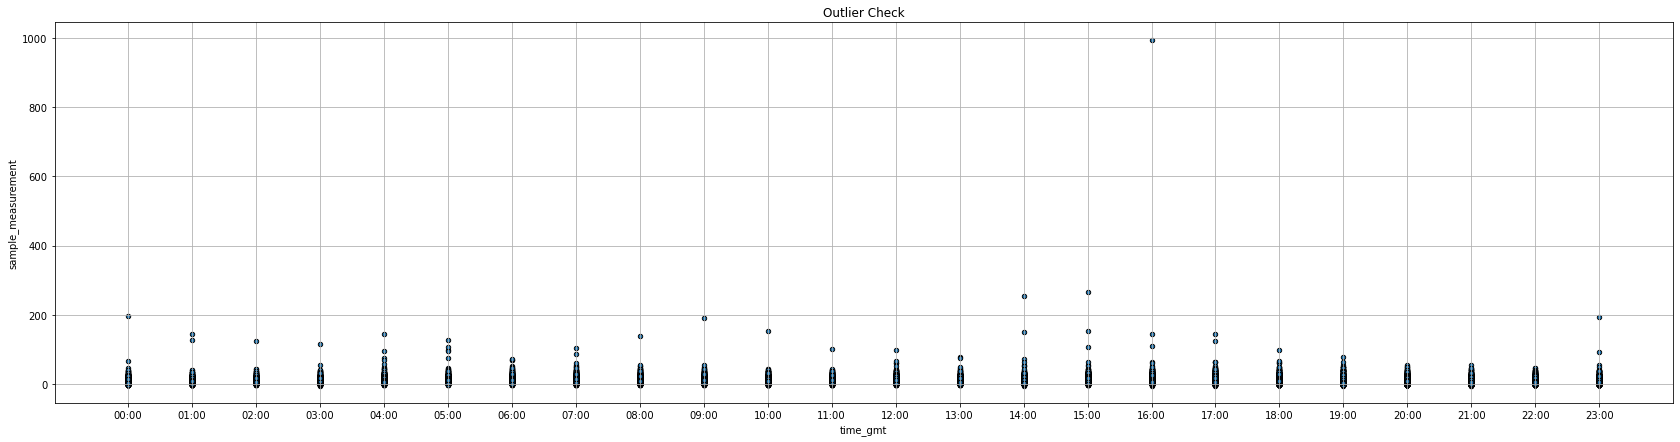

In [9]:
#Use Scatter Plot to visualize outliers.
california_filtered_df.sort_values(by='time_gmt', axis=0).plot('time_gmt', 
                    'sample_measurement', 
                    kind='scatter', 
                    grid=True, 
                    title=f'Outlier Check', 
                    edgecolors='black',
                    linewidths=.9,
                    figsize=(29, 7))

plt.show()

In [10]:
# Based off the scatter plot, outliers can be found with a sample data over 400. Show all outliers over 400 sample measurement.
outlier = california_filtered_df[(california_filtered_df[['sample_measurement']] > 400).all(axis=1)]
outlier

,state_code,state,county_code,county,site_number,parameter,sample_measurement,units_of_measure,latitude,longitude,date_local,time_local,date_gmt,time_gmt,method_type,method_code,method,date_of_last_change,cbsa_code
15560,6,California,37,Los Angeles,1201,Acceptable PM2.5 AQI & Speciation Mass,995.6,Micrograms/cubic meter (LC),34.19925,-118.53276,2019-10-11,08:00,2019-10-11,16:00,Non-FRM,731,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,2020-03-25,31080


#### **Continue: Cleaned dataframe being used for analysis**

In [11]:
# Select certain columns to use for mapping, 
california_filtered_df=california_filtered_df[['county','site_number','sample_measurement','latitude','longitude','time_local','date_gmt','time_gmt','date_of_last_change']]
# Drop nan values and empty values
california_filtered_df=california_filtered_df.dropna()
# Remove all numbers below 0 and above 400
california_filtered_df=california_filtered_df[(california_filtered_df[['sample_measurement']] > 0).all(axis=1) & (california_filtered_df[['sample_measurement']] < 400).all(axis=1)]

ca_filtered_noIndexChange = california_filtered_df

In [12]:
# Assign date_gmt DateTimeIndex. Allows for date searching throug index.
california_filtered_df['date_gmt']=pd.DatetimeIndex(california_filtered_df['date_gmt'])
#Set index to date_gmt
california_filtered_df = california_filtered_df.set_index('date_gmt')

In [13]:
# Copy of clean data
california_clean_data = california_filtered_df.copy()

**Tool**: Search index by date range

In [14]:
# Search index by date range
california_clean_data['2019-01-01':'2019-02-02']

,county,site_number,sample_measurement,latitude,longitude,time_local,time_gmt,date_of_last_change
date_gmt,,,,,,,,
2019-01-01,Los Angeles,16,6.2,34.14435,-117.85036,00:00,08:00,2019-06-24
2019-01-01,Los Angeles,16,6.4,34.14435,-117.85036,01:00,09:00,2019-06-24
2019-01-01,Los Angeles,16,7.7,34.14435,-117.85036,02:00,10:00,2019-06-24
2019-01-01,Los Angeles,16,7.2,34.14435,-117.85036,03:00,11:00,2019-06-24
2019-01-01,Los Angeles,16,5.2,34.14435,-117.85036,04:00,12:00,2019-06-24
...,...,...,...,...,...,...,...,...
2019-02-02,Los Angeles,4004,5.3,33.79236,-118.17533,11:00,19:00,2019-06-24
2019-02-02,Los Angeles,4004,5.1,33.79236,-118.17533,12:00,20:00,2019-06-24
2019-02-02,Los Angeles,4004,3.9,33.79236,-118.17533,13:00,21:00,2019-06-24


In [15]:
# Color thresholds
colors_list = []
for row in california_clean_data['sample_measurement']:
    # if more than a value,
    if row > 55.5:
        # Append color value
        colors_list.append('#e80c0c')
    # else, if more than a value,
    elif row > 35.5:
        # Append color value
        colors_list.append('#e8970c')
    elif row > 12.1:
        # Append color value
        colors_list.append('#dbe36b')
    elif row > 0:
        # Append color value
        colors_list.append('#5cb85c')
    else:
        # Append a failing grade
        colors_list.append('Failed')
        #print(f'failed to apply color on row {row}')
        
# Create a column from the list
california_clean_data['color'] = colors_list

california_clean_data['color'].value_counts()

#5cb85c    26890
#dbe36b    14575
#e8970c      300
#e80c0c       59
Name: color, dtype: int64

<a id='aircolors'></a>

------

### **Difference in colors warning & how much time we spend in different air quality measurements**

#### **Objective**
Use full Sample Dataset. Get percentage of dataset that is in Good, Moderate, Unhealthy and Very Unhealthy for the year.

In [16]:
living_in_air_pollution_percentage = []

In [17]:
living_in_air_pollution_percentage.append(california_clean_data['color'].value_counts()[0]/california_clean_data['color'].value_counts().sum())
living_in_air_pollution_percentage.append(california_clean_data['color'].value_counts()[1]/california_clean_data['color'].value_counts().sum())
living_in_air_pollution_percentage.append(california_clean_data['color'].value_counts()[2]/california_clean_data['color'].value_counts().sum())
living_in_air_pollution_percentage.append(california_clean_data['color'].value_counts()[3]/california_clean_data['color'].value_counts().sum())


In [18]:
# Round value.
round_value = [round(num, 2) for num in living_in_air_pollution_percentage]
key_list = ['Good (0 - 12.0):', 'Moderate (12.1 - 35.4):', 'Unhealthy (55.5 - 150.4):', 'Very Unhealthy (150.2+):']
#key_list = ['Green:','Yellow:','Orange:','Red:']

# Combine both for loop generated list into one.
percentage_rounded = [dict(zip(key_list, round_value))]
percentage_rounded

[{'Good (0 - 12.0):': 0.64,
  'Moderate (12.1 - 35.4):': 0.35,
  'Unhealthy (55.5 - 150.4):': 0.01,
  'Very Unhealthy (150.2+):': 0.0}]

In [19]:
# Display Percentage Rounded (above) in a DataFrame. Used to plot.
percentage_rounded_df = pd.DataFrame(percentage_rounded)
percentage_rounded_df

,Good (0 - 12.0):,Moderate (12.1 - 35.4):,Unhealthy (55.5 - 150.4):,Very Unhealthy (150.2+):
0,0.64,0.35,0.01,0.0


In [20]:
# Get column names
res_columns=percentage_rounded_df.columns

In [21]:
# Results for plot
results=percentage_rounded_df.iloc[0]

In [22]:
# Group means for plotting red line. Might use. 
group_means=results.mean()

In [23]:
# Function to convert x-label value into percentage. 
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '{:.0%}'.format(x)
    else:
        s = '{:.0%}'.format(x)
    return s
formatter = FuncFormatter(currency)

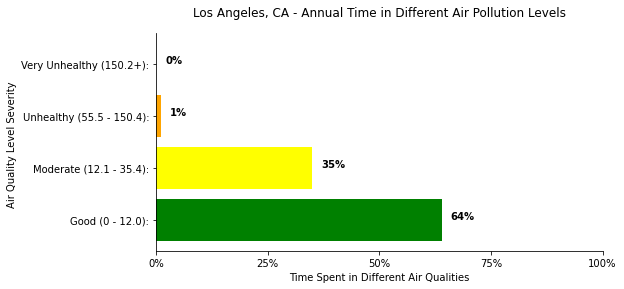

In [24]:
# Plot Percentage of time spent in different air quality.
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(res_columns,results, color=('green','yellow','orange','red'))
labels = ax.get_xticklabels()

plt.setp(labels, 
         horizontalalignment='center')

# Add a vertical line, here we set the style in the function call
#ax.axvline(group_means,ls='--', color='r')

# Text values next to bars
for i, v in enumerate(results):
    ax.text(v + .02, i + .01, ('{:.0%}'.format(v)), color='black', fontweight='bold')

# Move title higher
ax.title.set(y=1.05)

ax.set(xlabel='Time Spent in Different Air Qualities', 
       ylabel='Air Quality Level Severity ',
       title='Los Angeles, CA - Annual Time in Different Air Pollution Levels')
ax.xaxis.set_major_formatter(formatter)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Set xticks range
ax.set_xticks([0.0, .25, .5, .75, 1.0])
# plt.savefig("./Images/LA_Annual_TimeInPollution_bar.png")
plt.show()

---------

### Single date - California Air Pollution Data
Date: 2019-01-01

In [25]:
# Single date - California Air Pollution Data
single_date_ca_air = california_clean_data.loc['2019-01-01']
#single_date_ca_air
#california_clean_data

In [26]:
range_time = single_date_ca_air['time_gmt'].sort_values().unique()

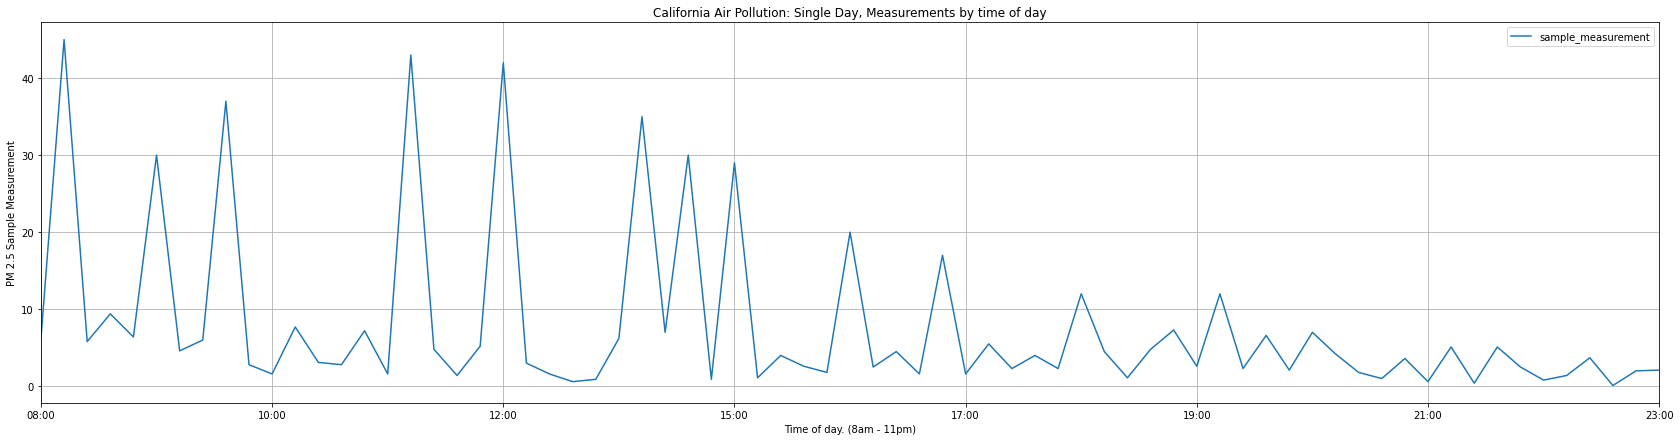

In [27]:
single_date_ca_air.sort_values(by='time_gmt', axis=0).plot(x='time_gmt', y='sample_measurement', kind='line', figsize=(29, 7),grid=True, title="California Air Pollution: Single Day, Measurements by time of day")
#plt.xticks(np.arange(int(test),int(test2), 3.5))
plt.ylabel('PM 2.5 Sample Measurement')
plt.xlabel('Time of day. (8am - 11pm)')
plt.xlim([0,70])
plt.show()

<a id='annualair'></a>

## **Annual California Air Pollution. Measurement by Day of Year.**
Date Range: 2019-01-01 - 2019-12-02

In [28]:
california_clean_data.sort_values(by='time_gmt', axis=0)

,county,site_number,sample_measurement,latitude,longitude,time_local,time_gmt,date_of_last_change,color
date_gmt,,,,,,,,,
2019-10-14,Los Angeles,1201,17.8,34.19925,-118.53276,16:00,00:00,2020-03-25,#dbe36b
2019-05-31,Los Angeles,1103,13.0,34.06659,-118.22688,16:00,00:00,2019-10-07,#dbe36b
2019-07-11,Los Angeles,4004,11.1,33.79236,-118.17533,16:00,00:00,2020-02-10,#5cb85c
2019-11-25,Los Angeles,16,7.6,34.14435,-117.85036,16:00,00:00,2020-03-24,#5cb85c
2019-06-14,Los Angeles,6012,12.1,34.38344,-118.52840,16:00,00:00,2019-10-07,#5cb85c
...,...,...,...,...,...,...,...,...,...
2019-05-02,Los Angeles,6012,16.3,34.38344,-118.52840,15:00,23:00,2019-10-07,#dbe36b
2019-12-22,Los Angeles,16,7.8,34.14435,-117.85036,15:00,23:00,2020-03-24,#5cb85c
2019-04-11,Los Angeles,1103,6.0,34.06659,-118.22688,15:00,23:00,2019-10-07,#5cb85c


In [29]:
# dataframe to plot
plot_df = california_clean_data.copy()
#ax.plot(date, site_number_1103.sample_measurement)
plot_y_information = plot_df.sample_measurement

In [30]:
color_threshold = plot_df.color

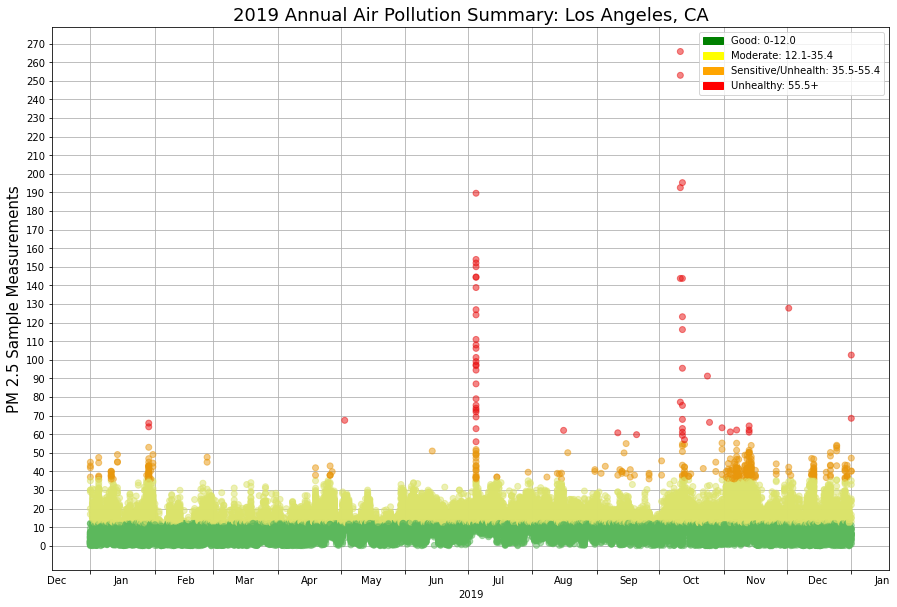

In [31]:
# Assigm date as index of dataframe. Dataframe index has dates
date = plot_df.index.astype('O')

# Data for plt
x = date
y = plot_y_information
c = color_threshold.values

# Plot subplots
fig, ax = plt.subplots(figsize=(15,10))
scatter = ax.scatter(x,y, c=c, alpha=.5,zorder=2)

# Set month in xaxis by searching date format
ax.xaxis.set_major_locator(dates.MonthLocator())

# 16 is a slight approximation since months differ in number of days.
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))


# loop for custom tickers. Assign marker size and center text
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

    
imid = len(plot_df) // 2
ax.set_xlabel(str(date[imid].year))
ax.set_ylabel('PM 2.5 Sample Measurements', size=15)
ax.set_yticks(range(0, 275, 10))
ax.set_title('2019 Annual Air Pollution Summary: Los Angeles, CA', size=18)

plt.grid(True)


# Labels for legend
green = mpatches.Patch(color='green', label='Good: 0-12.0')
yellow = mpatches.Patch(color='yellow', label='Moderate: 12.1-35.4')
orange = mpatches.Patch(color='orange', label='Sensitive/Unhealth: 35.5-55.4')
red = mpatches.Patch(color='red', label='Unhealthy: 55.5+')
#Call legend
plt.legend(handles = [green,yellow,orange,red])

# Save an image of the chart and print it to the screen
# plt.savefig("./Images/LA_Annual_pm25_scatter.png")
plt.show()

<a id='iqrdata'></a>

### **Begin IQR research - Annual Sample Results**

In [32]:
# Copy of clean data
ca_la_box_data = ca_filtered_noIndexChange
# Sort Values
ca_la_box_data=ca_la_box_data.sort_values(["date_gmt", "time_gmt"])

In [33]:
# Set index to site_number. Sort values by site_number and time_gmt
ca_la_box_data.sort_values(by=['site_number','time_gmt'], ascending=True)

,county,site_number,sample_measurement,latitude,longitude,time_local,date_gmt,time_gmt,date_of_last_change
16,Los Angeles,16,4.7,34.144350,-117.850360,16:00,2019-01-02,00:00,2019-06-24
40,Los Angeles,16,7.3,34.144350,-117.850360,16:00,2019-01-03,00:00,2019-06-24
64,Los Angeles,16,7.0,34.144350,-117.850360,16:00,2019-01-04,00:00,2019-06-24
88,Los Angeles,16,15.2,34.144350,-117.850360,16:00,2019-01-05,00:00,2019-06-24
112,Los Angeles,16,11.4,34.144350,-117.850360,16:00,2019-01-06,00:00,2019-06-24
...,...,...,...,...,...,...,...,...,...
26336,Los Angeles,9034,5.9,34.813034,-118.884819,00:00,2019-06-14,08:00,2020-04-15
26337,Los Angeles,9034,4.7,34.813034,-118.884819,00:00,2019-06-17,08:00,2020-04-15
26338,Los Angeles,9034,5.9,34.813034,-118.884819,00:00,2019-06-20,08:00,2020-04-15
26339,Los Angeles,9034,3.1,34.813034,-118.884819,00:00,2019-06-23,08:00,2020-04-15


In [34]:
# Filter DF to only columns used
filtered_ca_la_box_data = ca_la_box_data[['sample_measurement', 'site_number','time_gmt']].set_index('site_number').sort_values(by=['site_number','time_gmt'], ascending=True)

In [35]:
# Make a list of site_numbers. Used in for loops to grab specific data by site number & used for new df header.
filtered_ca_la_box_list = filtered_ca_la_box_data.index.unique().tolist()

In [36]:
# Look through sample measurement list and count the amount of mice in each drug regimen.
# Create an empty list to fill with for loop
measurement_quartile=[]

# Search through filtered_ca_la_box_data with '.loc[site_number, 'sample_measurement' column]' and get the quartile
for i in filtered_ca_la_box_list:
    location = filtered_ca_la_box_data.loc[i, 'sample_measurement'].quantile(q=[.25, .5, .75])
    # append results to measurement_quartile list before moving to next value in tumor_regimen_list
    measurement_quartile.append(location)

In [37]:
measurement_quartile

[0.25     6.9
 0.50    10.7
 0.75    15.6
 Name: sample_measurement, dtype: float64,
 0.25     8.0
 0.50    12.0
 0.75    17.0
 Name: sample_measurement, dtype: float64,
 0.25     7.0
 0.50    10.9
 0.75    15.0
 Name: sample_measurement, dtype: float64,
 0.25     6.0
 0.50     9.4
 0.75    13.3
 Name: sample_measurement, dtype: float64,
 0.25     3.5
 0.50     6.7
 0.75    10.6
 Name: sample_measurement, dtype: float64,
 0.25    1.3
 0.50    2.2
 0.75    3.2
 Name: sample_measurement, dtype: float64]

In [38]:
iqr_all = []

# loop through measurement_quartile range (0-10). Find IQR by selecting one value at a time in the measurement_quartile list. 
for i in range(len(measurement_quartile)):
    iqr = (measurement_quartile[i][0.75])-(measurement_quartile[i][0.25])
    # Append finding to iqr_all list before moving to next value
    iqr_all.append(iqr)
#print(iqr_all)

In [39]:
# Show list. Verify we have correct amount
iqr_all

[8.7, 9.0, 8.0, 7.300000000000001, 7.1, 1.9000000000000001]

In [40]:
assert len(iqr_all) == 6

In [41]:
headers_list=['Glendora, CA (16)','Downtown LA (1103)','Reseda, CA (1201)','Long Beach, CA (4004)','Santa Clarita, CA (6012)','Lebec, CA (9034)']

In [42]:
# Round value.
round_iqr_all = [round(num, 2) for num in iqr_all]

# Combine both for loop generated list into one.
measurements_iqr_all = [dict(zip(headers_list, round_iqr_all))]
measurements_iqr_all

[{'Glendora, CA (16)': 8.7,
  'Downtown LA (1103)': 9.0,
  'Reseda, CA (1201)': 8.0,
  'Long Beach, CA (4004)': 7.3,
  'Santa Clarita, CA (6012)': 7.1,
  'Lebec, CA (9034)': 1.9}]

In [43]:
# Display in dataframe
measurements_iqr_all_df=pd.DataFrame(measurements_iqr_all)
measurements_iqr_all_df

,"Glendora, CA (16)",Downtown LA (1103),"Reseda, CA (1201)","Long Beach, CA (4004)","Santa Clarita, CA (6012)","Lebec, CA (9034)"
0,8.7,9.0,8.0,7.3,7.1,1.9


<a id='boxplotdata'></a>

### **Begin Box Plots - Annual Sample Results**

In [44]:
# Values for plotting
box_plot_values = round_iqr_all
# Sort to determine outliers
values_sorted = sorted(box_plot_values)
print(values_sorted)

[1.9, 7.1, 7.3, 8.0, 8.7, 9.0]


In [45]:
# Reset dataframe for filtering
filtered_ca_la_box_data=filtered_ca_la_box_data.reset_index()

In [46]:
#Filter: By site location number. Set as own dataframe
ca_la_box_16=filtered_ca_la_box_data[filtered_ca_la_box_data['site_number'] == 16]
ca_la_box_1103=filtered_ca_la_box_data[filtered_ca_la_box_data['site_number'] == 1103]
ca_la_box_1201=filtered_ca_la_box_data[filtered_ca_la_box_data['site_number'] == 1201]
ca_la_box_4004=filtered_ca_la_box_data[filtered_ca_la_box_data['site_number'] == 4004]
ca_la_box_6012=filtered_ca_la_box_data[filtered_ca_la_box_data['site_number'] == 6012]
ca_la_box_9034=filtered_ca_la_box_data[filtered_ca_la_box_data['site_number'] == 9034]

In [47]:
# Sample measurement values per site location
site_16_measurements = ca_la_box_16['sample_measurement']
site_1103_measurements = ca_la_box_1103['sample_measurement']
site_1201_measurements = ca_la_box_1201['sample_measurement']
site_4004_measurements = ca_la_box_4004['sample_measurement']
site_6012_measurements = ca_la_box_6012['sample_measurement']
site_9034_measurements = ca_la_box_9034['sample_measurement']
total = len(site_16_measurements)+len(site_1103_measurements)+len(site_1201_measurements)+len(site_4004_measurements)+len(site_6012_measurements)+len(site_9034_measurements)

Total Samples Measured: 41824


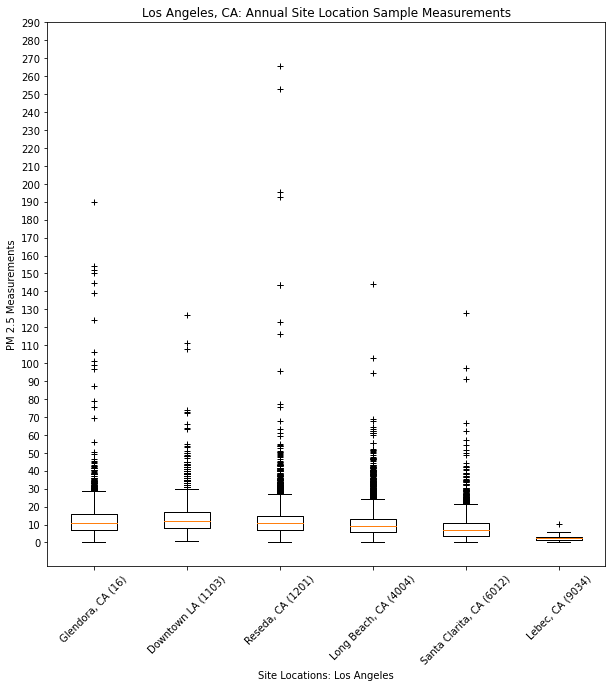

In [48]:
# Generate a box plot of the sample measurement of each site location, annually
measurement_plot_info = [site_16_measurements,site_1103_measurements,site_1201_measurements,site_4004_measurements,site_6012_measurements,site_9034_measurements]
plot_labels = ['Site 16','Site 1103','Site 1201','Site 4004','Site 6012','Site 9034']
fig, ax = plt.subplots(figsize=(10, 10))
pos = np.array(range(len(measurement_plot_info))) + 1
bp = ax.boxplot(measurement_plot_info, sym='k+', showfliers=True)

ax.set_xticklabels(headers_list, rotation=45)
ax.set_yticks(range(0, 300, 10))
ax.set_xlabel('Site Locations: Los Angeles')
ax.set_ylabel('PM 2.5 Measurements')
ax.set_title('Los Angeles, CA: Annual Site Location Sample Measurements')

plt.savefig("./Images/LA_Annual_pm25_boxplot.png")
print(f'Total Samples Measured: {total}')
plt.show()

Potential Outliers

Filtering by outlier values and dates may tell us which day/month of the year has larger than normal air pollution measurements. 

In [380]:
# Glendora, CA (16) Outliers
glendora_annual_outliers = bp["fliers"][0].get_data()[1]
glendora_annual_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(site_16_measurements)}')
print(f'Total amount of outliers: {len(glendora_annual_outliers)}')
print(f'Glendora Outlier values: {glendora_annual_outliers}')

Total amount samples in set: 8575
Total amount of outliers: 131
Glendora Outlier values: [ 28.7  28.7  28.7  28.7  28.9  28.9  28.9  28.9  28.9  28.9  29.1  29.1
  29.1  29.1  29.1  29.1  29.1  29.2  29.4  29.4  29.4  29.4  29.4  29.4
  29.5  29.5  29.6  29.6  29.7  29.7  29.8  29.9  29.9  29.9  30.2  30.2
  30.4  30.4  30.4  30.4  30.6  30.6  30.6  30.6  30.8  30.9  31.1  31.1
  31.1  31.3  31.3  31.4  31.4  31.5  31.6  31.6  31.8  31.8  31.8  32.
  32.3  32.4  32.5  33.1  33.3  33.3  33.3  33.3  33.3  33.4  33.6  33.6
  33.8  33.8  34.   34.   34.3  34.5  34.5  34.7  35.   35.   35.5  35.5
  35.7  35.7  36.   36.1  37.   37.2  38.   38.   38.2  38.2  38.2  38.7
  39.   39.3  40.   40.4  40.4  40.4  41.4  41.6  41.6  42.1  42.4  42.6
  43.4  44.5  45.   45.3  46.7  49.1  50.3  56.   69.3  75.6  79.1  87.1
  96.9  99.1 101.3 106.2 124.2 138.9 144.6 150.1 152.1 154.  189.6]


In [381]:
# Downtown LA, CA (1103) Outliers
la_annual_outliers = bp["fliers"][1].get_data()[1]
la_annual_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(site_1103_measurements)}')
print(f'Total amount of outliers: {len(la_annual_outliers)}')
print(f'Downtown LA Outlier values: {la_annual_outliers}')

Total amount samples in set: 8499
Total amount of outliers: 214
Downtown LA Outlier values: [ 31.  31.  31.  31.  31.  31.  31.  31.  31.  31.  31.  31.  31.  31.
  31.  31.  31.  31.  31.  31.  31.  31.  31.  31.  32.  32.  32.  32.
  32.  32.  32.  32.  32.  32.  32.  32.  32.  32.  32.  32.  32.  32.
  32.  32.  32.  32.  32.  32.  32.  32.  32.  32.  32.  32.  32.  33.
  33.  33.  33.  33.  33.  33.  33.  33.  33.  33.  33.  33.  33.  33.
  33.  33.  33.  33.  33.  33.  33.  33.  33.  33.  34.  34.  34.  34.
  34.  34.  34.  34.  34.  34.  34.  34.  34.  34.  34.  34.  35.  35.
  35.  35.  35.  35.  35.  35.  35.  35.  35.  36.  36.  36.  36.  36.
  36.  36.  36.  36.  37.  37.  37.  37.  37.  37.  37.  37.  37.  37.
  37.  37.  37.  37.  37.  37.  38.  38.  38.  38.  38.  38.  38.  38.
  38.  38.  38.  38.  38.  38.  38.  38.  38.  39.  39.  39.  39.  39.
  39.  39.  39.  39.  39.  39.  39.  40.  40.  40.  40.  40.  40.  40.
  40.  40.  40.  41.  41.  41.  41.  41.  42.  42.  42. 

In [382]:
# Reseda, CA (1201) Outliers
reseda_annual_outliers = bp["fliers"][2].get_data()[1]
reseda_annual_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(site_1201_measurements)}')
print(f'Total amount of outliers: {len(reseda_annual_outliers)}')
print(f'Reseda Outlier values: {reseda_annual_outliers}')

Total amount samples in set: 8584
Total amount of outliers: 257
Reseda Outlier values: [ 27.1  27.1  27.1  27.1  27.2  27.2  27.2  27.2  27.3  27.3  27.4  27.5
  27.5  27.5  27.5  27.5  27.5  27.5  27.5  27.6  27.6  27.6  27.6  27.6
  27.6  27.8  27.8  27.8  27.8  27.9  28.   28.   28.   28.   28.   28.1
  28.1  28.1  28.1  28.1  28.1  28.1  28.1  28.3  28.3  28.3  28.4  28.4
  28.4  28.5  28.5  28.6  28.6  28.7  28.8  28.8  28.8  28.8  28.8  28.8
  28.8  28.9  29.   29.   29.   29.   29.2  29.2  29.2  29.2  29.3  29.3
  29.3  29.3  29.3  29.3  29.3  29.3  29.3  29.4  29.5  29.5  29.5  29.6
  29.6  29.6  29.7  29.7  29.8  29.8  29.9  30.   30.   30.   30.   30.
  30.1  30.1  30.3  30.3  30.3  30.3  30.4  30.5  30.5  30.5  30.5  30.5
  30.5  30.6  30.6  30.6  30.7  30.8  30.9  31.   31.   31.   31.   31.1
  31.2  31.2  31.3  31.3  31.3  31.4  31.5  31.5  31.6  31.6  31.7  31.9
  32.   32.1  32.2  32.2  32.2  32.2  32.3  32.4  32.4  32.4  32.5  32.7
  32.9  33.   33.1  33.1  33.3  33.4  

In [383]:
# Long Beach, CA (4004) Outliers
lb_annual_outliers = bp["fliers"][3].get_data()[1]
lb_annual_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(site_4004_measurements)}')
print(f'Total amount of outliers: {len(lb_annual_outliers)}')
print(f'Long Beach Outlier values: {lb_annual_outliers}')

Total amount samples in set: 8611
Total amount of outliers: 416
Long Beach Outlier values: [ 24.3  24.3  24.3  24.3  24.3  24.3  24.3  24.4  24.4  24.4  24.4  24.4
  24.4  24.4  24.4  24.4  24.4  24.4  24.6  24.6  24.6  24.6  24.6  24.6
  24.6  24.6  24.6  24.6  24.6  24.6  24.6  24.6  24.7  24.7  24.7  24.7
  24.8  24.8  24.8  24.9  24.9  24.9  24.9  24.9  24.9  24.9  24.9  24.9
  24.9  25.1  25.1  25.1  25.1  25.1  25.1  25.1  25.1  25.1  25.2  25.2
  25.3  25.3  25.3  25.4  25.4  25.4  25.4  25.6  25.6  25.6  25.6  25.6
  25.6  25.6  25.6  25.6  25.7  25.8  25.8  25.9  25.9  25.9  25.9  25.9
  25.9  25.9  25.9  25.9  25.9  26.   26.1  26.1  26.1  26.1  26.1  26.2
  26.3  26.3  26.3  26.4  26.4  26.4  26.4  26.4  26.4  26.4  26.4  26.4
  26.4  26.5  26.6  26.6  26.6  26.6  26.6  26.6  26.6  26.6  26.6  26.6
  26.6  26.8  26.8  26.8  26.8  26.9  26.9  26.9  26.9  26.9  26.9  27.1
  27.1  27.1  27.1  27.3  27.3  27.3  27.4  27.4  27.4  27.4  27.4  27.4
  27.4  27.5  27.5  27.5  27.5  2

In [384]:
# Santa Clarita, CA (6012) Outliers
santaclarita_annual_outliers = bp["fliers"][4].get_data()[1]
santaclarita_annual_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(site_6012_measurements)}')
print(f'Total amount of outliers: {len(santaclarita_annual_outliers)}')
print(f'Santa Clarita Outlier values: {santaclarita_annual_outliers}')

Total amount samples in set: 7506
Total amount of outliers: 212
Santa Clarita Outlier values: [ 21.3  21.4  21.4  21.4  21.4  21.4  21.4  21.4  21.4  21.4  21.6  21.6
  21.6  21.6  21.6  21.6  21.6  21.6  21.6  21.6  21.8  21.8  21.9  21.9
  21.9  21.9  21.9  21.9  21.9  21.9  21.9  21.9  21.9  21.9  21.9  21.9
  22.   22.1  22.1  22.1  22.1  22.1  22.1  22.1  22.1  22.2  22.2  22.3
  22.3  22.3  22.4  22.4  22.4  22.4  22.4  22.4  22.4  22.4  22.6  22.6
  22.6  22.6  22.6  22.7  22.8  22.8  22.8  22.8  22.8  22.9  22.9  22.9
  23.   23.1  23.1  23.1  23.1  23.1  23.3  23.3  23.3  23.3  23.3  23.3
  23.4  23.4  23.6  23.6  23.6  23.8  23.8  23.8  23.8  23.8  23.8  23.8
  23.8  23.9  24.1  24.1  24.1  24.1  24.2  24.3  24.3  24.3  24.3  24.3
  24.3  24.3  24.3  24.3  24.3  24.4  24.4  24.5  24.5  24.5  24.5  24.5
  24.5  24.7  24.8  24.8  24.9  25.   25.   25.1  25.3  25.3  25.3  25.3
  25.5  25.5  25.5  25.5  25.8  26.   26.   26.1  26.2  26.3  26.5  26.5
  26.6  26.8  26.8  26.8  27. 

In [385]:
# Lebec, CA (9034) Outliers
Lebec_annual_outliers = bp["fliers"][5].get_data()[1]
Lebec_annual_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(site_9034_measurements)}')
print(f'Total amount of outliers: {len(Lebec_annual_outliers)}')
print(f'Lebec Outlier values: {Lebec_annual_outliers}')

Total amount samples in set: 49
Total amount of outliers: 1
Lebec Outlier values: [10.4]


<a id='timeofdaydata'></a>

## **Measurements by time of day**

Single Day

In [386]:
range_time = single_date_ca_air['time_gmt'].sort_values().unique()
range_time

array(['08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00',
       '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00',
       '22:00', '23:00'], dtype=object)

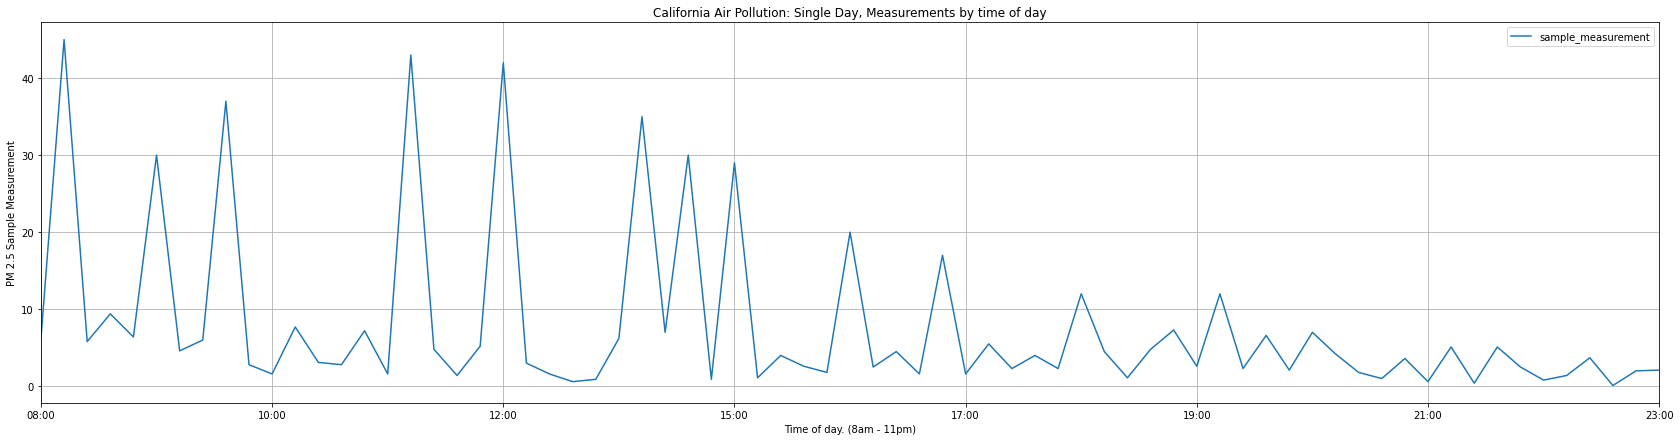

In [387]:
single_date_ca_air.sort_values(by='time_gmt', axis=0).plot(x='time_gmt', y='sample_measurement', kind='line', figsize=(29, 7),grid=True, title="California Air Pollution: Single Day, Measurements by time of day")
#plt.xticks(np.arange(int(test),int(test2), 3.5))
plt.ylabel('PM 2.5 Sample Measurement')
plt.xlabel('Time of day. (8am - 11pm)')
plt.xlim([0,70])
plt.show()

### Every day of the year by Time of day

In [388]:
# dataframe to plot
plot_df = california_clean_data.copy()
plot_df=plot_df.sort_values('time_gmt')
#ax.plot(date, site_number_1103.sample_measurement)
plot_y_information = plot_df.sample_measurement

In [389]:
color_threshold = plot_df.color

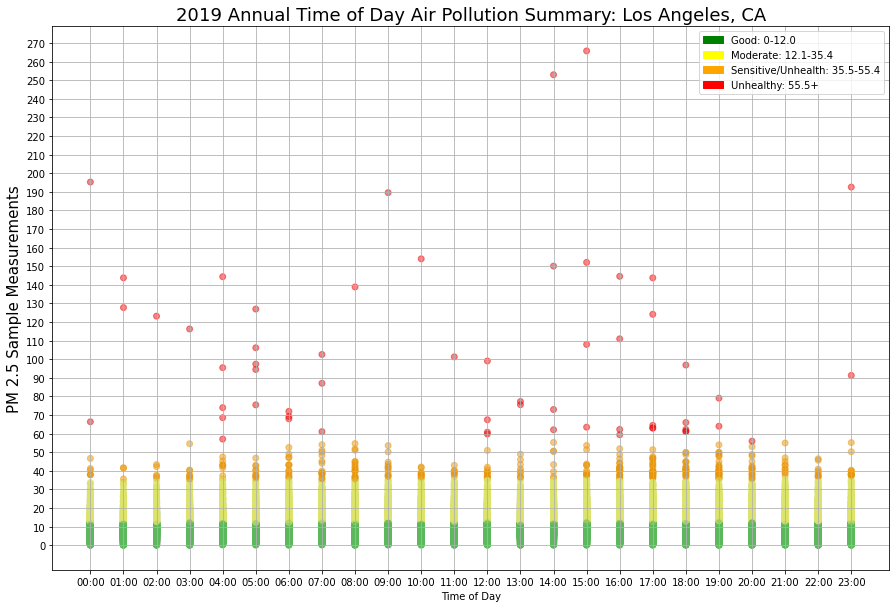

In [394]:
# Assigm date as index of dataframe. Dataframe index has dates
date = plot_df.time_gmt.astype('O')

# Data for plt
x = date
y = plot_y_information
c = color_threshold.values

# Plot subplots
fig, ax = plt.subplots(figsize=(15,10))
scatter = ax.scatter(x,y, c=c, alpha=.5)

imid = len(plot_df) // 2
ax.set_xlabel('Time of Day')
ax.set_ylabel('PM 2.5 Sample Measurements', size=15)
ax.set_yticks(range(0, 275, 10))
ax.set_title('2019 Annual Time of Day Air Pollution Summary: Los Angeles, CA', size=18)
plt.grid(True)

# Labels for legend
green = mpatches.Patch(color='green', label='Good: 0-12.0')
yellow = mpatches.Patch(color='yellow', label='Moderate: 12.1-35.4')
orange = mpatches.Patch(color='orange', label='Sensitive/Unhealth: 35.5-55.4')
red = mpatches.Patch(color='red', label='Unhealthy: 55.5+')
#Call legend
plt.legend(handles = [green,yellow,orange,red])

# Save an image of the chart and print it to the screen
plt.savefig("./Images/LA_Annual_TimeofDay_pm25_scatter.png")
plt.show()

In [165]:
# dataframe to plot
time_df = california_clean_data.copy()

In [166]:
# Format data
time_df=time_df.reset_index()
time_df=time_df.sort_values('time_gmt').set_index('time_gmt')
count_list=time_df.color.value_counts().keys().tolist()

In [167]:
# Loop through count_list. Add values to a dict.
finish_count_dict = {}
for value in count_list:
    if value == '#5cb85c':
        finish_count_dict.update({'Green':time_df['color'].value_counts()[0]})
    elif value == '#dbe36b':
        finish_count_dict.update({'Yellow':time_df['color'].value_counts()[1]})
    elif value == '#e8970c':
        finish_count_dict.update({'Orange':time_df['color'].value_counts()[2]})
    elif value == '#e80c0c':
        finish_count_dict.update({'Red':time_df['color'].value_counts()[3]})
    else:
        print('hex num not found.')

In [168]:
results = pd.DataFrame.from_dict(finish_count_dict, orient='index')
results

,0
Green,26890
Yellow,14575
Orange,300
Red,59
